# GRIP@ THE SPARKS FOUNDATION
## DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP
### TASK 7 - Stock Market Prediction using Numerical and Textual Analysis
### Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines
### Author - RANVEERKAR SHREYAS SURESH

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data preparation for Sentimental Analysis

In [17]:
headlines = pd.read_csv("india-news-headlines.csv")      #Reading data

In [18]:
headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [19]:
headlines.shape        #Same date has multiple rows

(3424067, 3)

In [20]:
headlines.isnull().sum()      #Checking for NULL values

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [21]:
headlines.dtypes              #Data types

publish_date          int64
headline_category    object
headline_text        object
dtype: object

In [22]:
from datetime import date  

In [23]:
def int2date(pdate : int) -> date:            #Converting Integer("publish_date" column) to Datetime format
    year = int(pdate/10000)
    month = int((pdate%10000)/100)
    day = int(pdate%100)
    return date(year,month,day)

In [24]:
date_form = []
for i in headlines["publish_date"] :
    date_form.append(int2date(i))

In [25]:
date_form[:4]

[datetime.date(2001, 1, 2),
 datetime.date(2001, 1, 2),
 datetime.date(2001, 1, 2),
 datetime.date(2001, 1, 2)]

In [26]:
headlines["publish_date"]=date_form

In [27]:
headlines.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [28]:
headlines["publish_date"].value_counts()

2014-10-10    706
2014-12-15    706
2014-12-21    706
2014-10-11    705
2014-11-09    705
             ... 
2001-03-16      1
2001-06-04      1
2001-03-17      1
2001-05-25      1
2001-03-09      1
Name: publish_date, Length: 7262, dtype: int64

In [29]:
headlines["publish_date"].dtypes          #type : object

dtype('O')

In [30]:
headlines["publish_date"] = pd.to_datetime(headlines.publish_date,format="%Y-%m-%d")

In [31]:
headlines.head()

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


In [32]:
headlines.duplicated().sum()      #Checking for same/repeating news

24191

In [33]:
headlines.duplicated(keep=False).sum()

46130

In [34]:
features = list(headlines.columns)
headlines.sort_values(by=features,inplace=True,ignore_index=True)

In [35]:
headlines[headlines.duplicated(keep=False)]

,publish_date,headline_category,headline_text
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,America's unwanted heading for India?
5,2001-01-02,unknown,America's unwanted heading for India?
6,2001-01-02,unknown,America's unwanted heading for India?
9,2001-01-02,unknown,BBC's reality TV will focus on AIIMS
...,...,...,...
3421893,2020-12-27,city.nagpur,Govt forcing helpless sr citizens to fight leg...
3422119,2020-12-28,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422120,2020-12-28,city.bareilly,Rampur's Hunar Haat a platform for artisans fr...
3422956,2020-12-29,city.pune,PMC to draft separate DP after 23 villages' me...


In [36]:
headlines.drop_duplicates(keep='last',inplace=True,ignore_index=True)     #Removing repeating news...keeping the last value

In [37]:
headlines.duplicated(keep=False).sum()

0

In [38]:
headlines.head()

,publish_date,headline_category,headline_text
0,2001-01-02,entertainment.hindi.bollywood,Raju Chacha
1,2001-01-02,unknown,A noisy effort to spruce up Commercial Street
2,2001-01-02,unknown,Akki-Alur and Ranebennur peaceful
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,Auto driver's murder: 4 held


In [39]:
headlines["publish_date"].value_counts().index                            #getting unique dates

DatetimeIndex(['2014-12-15', '2014-12-21', '2014-12-09', '2014-11-29',
               '2014-11-01', '2014-12-27', '2018-12-16', '2013-12-11',
               '2014-05-30', '2016-01-17',
               ...
               '2001-03-09', '2001-03-05', '2001-03-13', '2001-06-02',
               '2001-03-02', '2001-03-16', '2001-03-17', '2001-06-05',
               '2001-04-01', '2001-06-04'],
              dtype='datetime64[ns]', length=7262, freq=None)

In [40]:
unique_dates_list = headlines["publish_date"].value_counts().index.tolist()          #storing unique dates

In [41]:
unique_dates_list

[Timestamp('2014-12-15 00:00:00'),
 Timestamp('2014-12-21 00:00:00'),
 Timestamp('2014-12-09 00:00:00'),
 Timestamp('2014-11-29 00:00:00'),
 Timestamp('2014-11-01 00:00:00'),
 Timestamp('2014-12-27 00:00:00'),
 Timestamp('2018-12-16 00:00:00'),
 Timestamp('2013-12-11 00:00:00'),
 Timestamp('2014-05-30 00:00:00'),
 Timestamp('2016-01-17 00:00:00'),
 Timestamp('2017-02-07 00:00:00'),
 Timestamp('2014-10-11 00:00:00'),
 Timestamp('2013-09-24 00:00:00'),
 Timestamp('2014-12-03 00:00:00'),
 Timestamp('2013-12-05 00:00:00'),
 Timestamp('2016-05-19 00:00:00'),
 Timestamp('2015-01-22 00:00:00'),
 Timestamp('2018-07-26 00:00:00'),
 Timestamp('2014-10-21 00:00:00'),
 Timestamp('2013-07-11 00:00:00'),
 Timestamp('2016-10-14 00:00:00'),
 Timestamp('2015-07-18 00:00:00'),
 Timestamp('2017-05-22 00:00:00'),
 Timestamp('2016-12-27 00:00:00'),
 Timestamp('2016-11-20 00:00:00'),
 Timestamp('2013-10-13 00:00:00'),
 Timestamp('2016-08-21 00:00:00'),
 Timestamp('2016-02-09 00:00:00'),
 Timestamp('2016-05-

### Concatenating all headlines (for same date)

In [42]:
date_hlines = []
for i in unique_dates_list:
    df = headlines.loc[headlines["publish_date"] == i]
    hline_text = ''
    pdate = str(i)
    hline_text = df["headline_text"].iloc[0]
    for j in range(1, len(df)):
        hline_text = hline_text+ '. ' + df["headline_text"].iloc[j]
    date_hlines.append(hline_text)

In [43]:
news = pd.DataFrame({'publish_date': unique_dates_list, 'headline_text':date_hlines})

In [44]:
news.head()

,publish_date,headline_text
0,2014-12-15,Golden Homes III. Golden Panorama. Hanging Gar...
1,2014-12-21,Eight companies add Rs 55;171 crore in m-cap; ...
2,2014-12-09,Audi-Vredestein driving experience. Benelli TN...
3,2014-11-29,6 CARE IPO merchant bankers fined Rs 1 crore. ...
4,2014-11-01,Chetan Bhagat: Cleanliness begins at home. Gau...


In [45]:
news.shape

(7262, 2)

In [46]:
#sorting dates

news.sort_values(by="publish_date",inplace=True,ignore_index=True)

In [47]:
news

,publish_date,headline_text
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...
4,2001-01-06,Anti-immigration think-tank berates Clinton re...
...,...,...
7257,2020-12-27,Horoscope Today; 27 December 2020: Check astro...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Horoscope Today; 29 December 2020: Check astro...
7260,2020-12-30,Horoscope Today; 30 December 2020: Check astro...


In [48]:
news.dtypes

publish_date     datetime64[ns]
headline_text            object
dtype: object

In [49]:
news.headline_text[0]

"Raju Chacha. A noisy effort to spruce up Commercial Street. Akki-Alur and Ranebennur peaceful. America's unwanted heading for India?. Auto driver's murder: 4 held. Awareness rally on AIDS today. BBC's reality TV will focus on AIIMS. BJP jumps into rail track conversion issue. BJP to block traffic statewide on Jan 6. Bickering cost Dal(S) seats; admits Gowda. Bomb hoax triggers panic in Canara Bank. Cactus which made it to Guinness is dying. Come to Nandi Hills...and you can fly. Consul is back from month-long leave. Destroying myths and doubts on sexuality. Dilute the power of transfers; says Riberio. Dr Patwardhan to be felicitated. Extra buses to clear tourist traffic. Fashion in the future. Fissures in Hurriyat over Pak visit. Focus shifts to teaching of Hindi. For bigwigs; it is destination Goa. Gilani claims he applied for passport 2 years ago. HAL approached for super jumbo project. He beat polio; but a truck driver's is no life. Home is where the holistic science is. Hoshangaba

In [50]:
news1 = news.copy()
news1.head()

,publish_date,headline_text
0,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...
1,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...
2,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...
3,2001-01-05,Nepal won't allow anti-India activities: Envoy...
4,2001-01-06,Anti-immigration think-tank berates Clinton re...


In [51]:
#removing puncuations and replacing them with space

news1["headline_text"].replace("[^a-zA-Z]"," ",regex=True,inplace=True)
news1["headline_text"][0]

'Raju Chacha  A noisy effort to spruce up Commercial Street  Akki Alur and Ranebennur peaceful  America s unwanted heading for India   Auto driver s murder    held  Awareness rally on AIDS today  BBC s reality TV will focus on AIIMS  BJP jumps into rail track conversion issue  BJP to block traffic statewide on Jan    Bickering cost Dal S  seats  admits Gowda  Bomb hoax triggers panic in Canara Bank  Cactus which made it to Guinness is dying  Come to Nandi Hills   and you can fly  Consul is back from month long leave  Destroying myths and doubts on sexuality  Dilute the power of transfers  says Riberio  Dr Patwardhan to be felicitated  Extra buses to clear tourist traffic  Fashion in the future  Fissures in Hurriyat over Pak visit  Focus shifts to teaching of Hindi  For bigwigs  it is destination Goa  Gilani claims he applied for passport   years ago  HAL approached for super jumbo project  He beat polio  but a truck driver s is no life  Home is where the holistic science is  Hoshangaba

In [52]:
#Converting to all letters to lower case

news1["headline_text"] = news1["headline_text"].str.lower()
news1["headline_text"][0]

'raju chacha  a noisy effort to spruce up commercial street  akki alur and ranebennur peaceful  america s unwanted heading for india   auto driver s murder    held  awareness rally on aids today  bbc s reality tv will focus on aiims  bjp jumps into rail track conversion issue  bjp to block traffic statewide on jan    bickering cost dal s  seats  admits gowda  bomb hoax triggers panic in canara bank  cactus which made it to guinness is dying  come to nandi hills   and you can fly  consul is back from month long leave  destroying myths and doubts on sexuality  dilute the power of transfers  says riberio  dr patwardhan to be felicitated  extra buses to clear tourist traffic  fashion in the future  fissures in hurriyat over pak visit  focus shifts to teaching of hindi  for bigwigs  it is destination goa  gilani claims he applied for passport   years ago  hal approached for super jumbo project  he beat polio  but a truck driver s is no life  home is where the holistic science is  hoshangaba

## Textual analysis

In [53]:
!pip3 install textblob

In [54]:
from textblob import TextBlob         #for getting sentiment values

In [62]:
blob = TextBlob(news1["headline_text"][0])
print(blob.sentiment)
print("Polarity : {}, Subjectivity : {}".format(blob.sentiment[0],blob.sentiment[1]))

Sentiment(polarity=0.18070175438596492, subjectivity=0.2986842105263158)
Polarity : 0.18070175438596492, Subjectivity : 0.2986842105263158


In [65]:
polarity = []
subjectivity = []
for index, row in news1.iterrows():
    polarity.append(TextBlob(row["headline_text"]).sentiment[0])
    subjectivity.append(TextBlob(row["headline_text"]).sentiment[1])

In [66]:
#It is positive if polarity score>0, negative if polarity score<0, else neutral
#Polarity : [-1,+1]
#Subjectivity : [0,1]   {whether the text is an opinion or factual info}

news1["polarity"]=polarity
news1["subjectivity"]=subjectivity

In [68]:
news1

,publish_date,headline_text,polarity,subjectivity
0,2001-01-02,raju chacha a noisy effort to spruce up comme...,0.180702,0.298684
1,2001-01-03,devdas jinxed year old girl missing ...,0.089286,0.392857
2,2001-01-04,car dealers caught in bihar sales tax ruling ...,0.089802,0.478086
3,2001-01-05,nepal won t allow anti india activities envoy...,0.260138,0.470967
4,2001-01-06,anti immigration think tank berates clinton re...,0.219481,0.464935
...,...,...,...,...
7257,2020-12-27,horoscope today december check astro...,0.042495,0.392673
7258,2020-12-28,horoscope today december check astro...,0.071657,0.411422
7259,2020-12-29,horoscope today december check astro...,0.060775,0.415684
7260,2020-12-30,horoscope today december check astro...,0.046930,0.436863


In [69]:
news1.shape

(7262, 4)

## Plotting Polarity & Subjectivity

<AxesSubplot:>

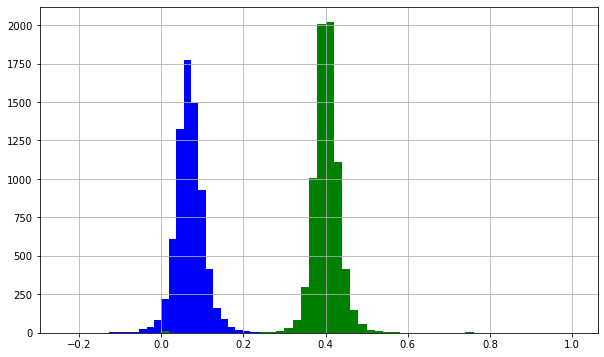

In [93]:
plt.figure(figsize=(10,6))
news1["polarity"].hist(color='blue',bins=50)
news1["subjectivity"].hist(color='green',bins=50)

## Sentiment Intensity Analyzer

In [101]:
!pip3 install nltk

In [103]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [104]:
sia = SentimentIntensityAnalyzer()

news1["compound"]=[sia.polarity_scores(v)["compound"] for v in news1["headline_text"]]
news1["negative"]=[sia.polarity_scores(v)["neg"] for v in news1["headline_text"]]
news1["neutral"]=[sia.polarity_scores(v)["neu"] for v in news1["headline_text"]]
news1["positive"]=[sia.polarity_scores(v)["pos"] for v in news1["headline_text"]]
news1

,publish_date,headline_text,polarity,subjectivity,compound,negative,neutral,positive
0,2001-01-02,raju chacha a noisy effort to spruce up comme...,0.180702,0.298684,-0.9080,0.131,0.780,0.089
1,2001-01-03,devdas jinxed year old girl missing ...,0.089286,0.392857,-0.8910,0.156,0.735,0.109
2,2001-01-04,car dealers caught in bihar sales tax ruling ...,0.089802,0.478086,0.8810,0.105,0.782,0.112
3,2001-01-05,nepal won t allow anti india activities envoy...,0.260138,0.470967,0.8658,0.152,0.666,0.183
4,2001-01-06,anti immigration think tank berates clinton re...,0.219481,0.464935,-0.8625,0.230,0.649,0.121
...,...,...,...,...,...,...,...,...
7257,2020-12-27,horoscope today december check astro...,0.042495,0.392673,-0.9998,0.145,0.763,0.092
7258,2020-12-28,horoscope today december check astro...,0.071657,0.411422,-0.9998,0.143,0.759,0.098
7259,2020-12-29,horoscope today december check astro...,0.060775,0.415684,-0.9999,0.167,0.731,0.101
7260,2020-12-30,horoscope today december check astro...,0.046930,0.436863,-0.9999,0.164,0.740,0.096


In [105]:
news2 = news1.copy()
news2

,publish_date,headline_text,polarity,subjectivity,compound,negative,neutral,positive
0,2001-01-02,raju chacha a noisy effort to spruce up comme...,0.180702,0.298684,-0.9080,0.131,0.780,0.089
1,2001-01-03,devdas jinxed year old girl missing ...,0.089286,0.392857,-0.8910,0.156,0.735,0.109
2,2001-01-04,car dealers caught in bihar sales tax ruling ...,0.089802,0.478086,0.8810,0.105,0.782,0.112
3,2001-01-05,nepal won t allow anti india activities envoy...,0.260138,0.470967,0.8658,0.152,0.666,0.183
4,2001-01-06,anti immigration think tank berates clinton re...,0.219481,0.464935,-0.8625,0.230,0.649,0.121
...,...,...,...,...,...,...,...,...
7257,2020-12-27,horoscope today december check astro...,0.042495,0.392673,-0.9998,0.145,0.763,0.092
7258,2020-12-28,horoscope today december check astro...,0.071657,0.411422,-0.9998,0.143,0.759,0.098
7259,2020-12-29,horoscope today december check astro...,0.060775,0.415684,-0.9999,0.167,0.731,0.101
7260,2020-12-30,horoscope today december check astro...,0.046930,0.436863,-0.9999,0.164,0.740,0.096


In [106]:
news2.rename(columns={"publish_date":"Date"},inplace=True)
news2.head()

,Date,headline_text,polarity,subjectivity,compound,negative,neutral,positive
0,2001-01-02,raju chacha a noisy effort to spruce up comme...,0.180702,0.298684,-0.9080,0.131,0.780,0.089
1,2001-01-03,devdas jinxed year old girl missing ...,0.089286,0.392857,-0.8910,0.156,0.735,0.109
2,2001-01-04,car dealers caught in bihar sales tax ruling ...,0.089802,0.478086,0.8810,0.105,0.782,0.112
3,2001-01-05,nepal won t allow anti india activities envoy...,0.260138,0.470967,0.8658,0.152,0.666,0.183
4,2001-01-06,anti immigration think tank berates clinton re...,0.219481,0.464935,-0.8625,0.230,0.649,0.121


## Data preparation for Numerical Analysis

In [71]:
stock_data = pd.read_csv("RELIANCE.NS.csv")          # Stock Prices for RELIANCE company

In [72]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,52.661041,55.546684,52.645569,54.819473,42.817074,42810928.0
1,2001-01-03,54.927780,55.964447,54.618328,55.709148,43.511967,57159622.0
2,2001-01-04,55.562157,56.769024,55.113453,55.361015,43.240051,38666386.0
3,2001-01-05,55.159870,56.753551,55.159870,56.366734,44.025570,48215173.0
4,2001-01-08,56.088226,56.854122,55.275913,55.732357,43.530090,44224788.0


In [73]:
stock_data.shape

(4997, 7)

In [74]:
stock_data.isnull().sum()     #Checking for NULL values

Date          0
Open         17
High         17
Low          17
Close        17
Adj Close    17
Volume       17
dtype: int64

In [75]:
stock_data.dropna(inplace=True)

In [76]:
stock_data.shape

(4980, 7)

In [77]:
stock_data.isnull().sum()      #Checking for NULL values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [78]:
stock_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [79]:
stock_data["Date"]=pd.to_datetime(stock_data.Date,format='%Y-%m-%d')

In [80]:
stock_data["Date"].dtypes

dtype('<M8[ns]')

In [81]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,52.661041,55.546684,52.645569,54.819473,42.817074,42810928.0
1,2001-01-03,54.927780,55.964447,54.618328,55.709148,43.511967,57159622.0
2,2001-01-04,55.562157,56.769024,55.113453,55.361015,43.240051,38666386.0
3,2001-01-05,55.159870,56.753551,55.159870,56.366734,44.025570,48215173.0
4,2001-01-08,56.088226,56.854122,55.275913,55.732357,43.530090,44224788.0


In [86]:
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4992,2020-12-23,1930.000000,1951.449951,1920.650024,1943.849976,1937.616821,8999898.0
4993,2020-12-24,1947.000000,1998.800049,1945.900024,1994.150024,1987.755615,9588577.0
4994,2020-12-28,2006.699951,2018.000000,1995.300049,2003.300049,1996.876221,7947719.0
4995,2020-12-29,2009.000000,2012.300049,1982.550049,1990.050049,1983.668701,8589407.0
4996,2020-12-30,1995.250000,2007.199951,1975.550049,1995.500000,1989.101196,10173132.0


### We will take "Closing Price" as dependent variable

Text(0.5, 1.0, 'Closing Price History for Reliance')

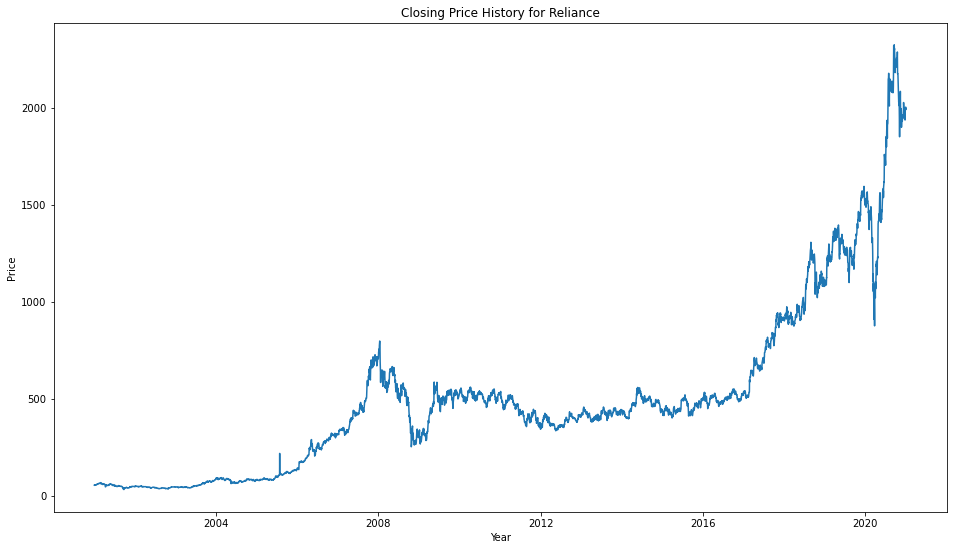

In [16]:
plt.figure(figsize=(16,9))
plt.plot(sdata.Close)
plt.ylabel("Price")
plt.xlabel("Year")
plt.title("Closing Price History for Reliance")

## Merging both the datasets

In [108]:
df_merge = pd.merge(stock_data,news2,how='inner',on='Date')

In [109]:
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,polarity,subjectivity,compound,negative,neutral,positive
0,2001-01-02,52.661041,55.546684,52.645569,54.819473,42.817074,42810928.0,raju chacha a noisy effort to spruce up comme...,0.180702,0.298684,-0.9080,0.131,0.780,0.089
1,2001-01-03,54.927780,55.964447,54.618328,55.709148,43.511967,57159622.0,devdas jinxed year old girl missing ...,0.089286,0.392857,-0.8910,0.156,0.735,0.109
2,2001-01-04,55.562157,56.769024,55.113453,55.361015,43.240051,38666386.0,car dealers caught in bihar sales tax ruling ...,0.089802,0.478086,0.8810,0.105,0.782,0.112
3,2001-01-05,55.159870,56.753551,55.159870,56.366734,44.025570,48215173.0,nepal won t allow anti india activities envoy...,0.260138,0.470967,0.8658,0.152,0.666,0.183
4,2001-01-08,56.088226,56.854122,55.275913,55.732357,43.530090,44224788.0,units to be sealed in phase ii of operation...,0.021469,0.421415,-0.8934,0.118,0.802,0.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,2020-12-23,1930.000000,1951.449951,1920.650024,1943.849976,1937.616821,8999898.0,horoscope today december check astro...,0.076211,0.389680,-0.9997,0.131,0.782,0.086
4946,2020-12-24,1947.000000,1998.800049,1945.900024,1994.150024,1987.755615,9588577.0,horoscope today december check astro...,0.053569,0.387011,-0.9993,0.116,0.801,0.084
4947,2020-12-28,2006.699951,2018.000000,1995.300049,2003.300049,1996.876221,7947719.0,horoscope today december check astro...,0.071657,0.411422,-0.9998,0.143,0.759,0.098
4948,2020-12-29,2009.000000,2012.300049,1982.550049,1990.050049,1983.668701,8589407.0,horoscope today december check astro...,0.060775,0.415684,-0.9999,0.167,0.731,0.101


In [110]:
df_merge.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'headline_text', 'polarity', 'subjectivity', 'compound', 'negative',
       'neutral', 'positive'],
      dtype='object')

In [113]:
new_df = df_merge[['Date','High', 'Low', 'Close','Volume','polarity', 'subjectivity', 'compound', 'negative',
       'neutral', 'positive']]

In [114]:
new_df.head()

,Date,High,Low,Close,Volume,polarity,subjectivity,compound,negative,neutral,positive
0,2001-01-02,55.546684,52.645569,54.819473,42810928.0,0.180702,0.298684,-0.9080,0.131,0.780,0.089
1,2001-01-03,55.964447,54.618328,55.709148,57159622.0,0.089286,0.392857,-0.8910,0.156,0.735,0.109
2,2001-01-04,56.769024,55.113453,55.361015,38666386.0,0.089802,0.478086,0.8810,0.105,0.782,0.112
3,2001-01-05,56.753551,55.159870,56.366734,48215173.0,0.260138,0.470967,0.8658,0.152,0.666,0.183
4,2001-01-08,56.854122,55.275913,55.732357,44224788.0,0.021469,0.421415,-0.8934,0.118,0.802,0.080


In [115]:
new_df.tail()

,Date,High,Low,Close,Volume,polarity,subjectivity,compound,negative,neutral,positive
4945,2020-12-23,1951.449951,1920.650024,1943.849976,8999898.0,0.076211,0.389680,-0.9997,0.131,0.782,0.086
4946,2020-12-24,1998.800049,1945.900024,1994.150024,9588577.0,0.053569,0.387011,-0.9993,0.116,0.801,0.084
4947,2020-12-28,2018.000000,1995.300049,2003.300049,7947719.0,0.071657,0.411422,-0.9998,0.143,0.759,0.098
4948,2020-12-29,2012.300049,1982.550049,1990.050049,8589407.0,0.060775,0.415684,-0.9999,0.167,0.731,0.101
4949,2020-12-30,2007.199951,1975.550049,1995.500000,10173132.0,0.046930,0.436863,-0.9999,0.164,0.740,0.096


In [116]:
new_df.shape

(4950, 11)

In [118]:
new_df.isna().sum().sum()

0

In [121]:
new_df.set_index('Date',inplace=True)    #Setting index to date

In [122]:
new_df.head()

,High,Low,Close,Volume,polarity,subjectivity,compound,negative,neutral,positive
Date,,,,,,,,,,
2001-01-02,55.546684,52.645569,54.819473,42810928.0,0.180702,0.298684,-0.9080,0.131,0.780,0.089
2001-01-03,55.964447,54.618328,55.709148,57159622.0,0.089286,0.392857,-0.8910,0.156,0.735,0.109
2001-01-04,56.769024,55.113453,55.361015,38666386.0,0.089802,0.478086,0.8810,0.105,0.782,0.112
2001-01-05,56.753551,55.159870,56.366734,48215173.0,0.260138,0.470967,0.8658,0.152,0.666,0.183
2001-01-08,56.854122,55.275913,55.732357,44224788.0,0.021469,0.421415,-0.8934,0.118,0.802,0.080


## Rolling mean & standard deviation (taking window size as 10 & 50)

In [123]:
new_df.columns

Index(['High', 'Low', 'Close', 'Volume', 'polarity', 'subjectivity',
       'compound', 'negative', 'neutral', 'positive'],
      dtype='object')

In [124]:
lag_features = ['High', 'Low', 'Volume', 'polarity', 'subjectivity',
       'compound', 'negative', 'neutral', 'positive']      #as independent variables
window1 = 10
window2 = 50

In [127]:
import warnings                    #Ignoring warnings
warnings.filterwarnings("ignore")

In [128]:
for feats in lag_features:
    new_df[feats+'_'+"rolling_mean_10"]=new_df[feats].rolling(window=window1).mean()
    new_df[feats+'_'+"rolling_mean_50"]=new_df[feats].rolling(window=window2).mean()

In [129]:
for feats in lag_features:
    new_df[feats+'_'+"rolling_std_10"]=new_df[feats].rolling(window=window1).std()
    new_df[feats+'_'+"rolling_std_50"]=new_df[feats].rolling(window=window2).std()

In [130]:
new_df.head()

,High,Low,Close,Volume,polarity,subjectivity,compound,negative,neutral,positive,...,subjectivity_rolling_std_10,subjectivity_rolling_std_50,compound_rolling_std_10,compound_rolling_std_50,negative_rolling_std_10,negative_rolling_std_50,neutral_rolling_std_10,neutral_rolling_std_50,positive_rolling_std_10,positive_rolling_std_50
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,55.546684,52.645569,54.819473,42810928.0,0.180702,0.298684,-0.9080,0.131,0.780,0.089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,55.964447,54.618328,55.709148,57159622.0,0.089286,0.392857,-0.8910,0.156,0.735,0.109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,56.769024,55.113453,55.361015,38666386.0,0.089802,0.478086,0.8810,0.105,0.782,0.112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,56.753551,55.159870,56.366734,48215173.0,0.260138,0.470967,0.8658,0.152,0.666,0.183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,56.854122,55.275913,55.732357,44224788.0,0.021469,0.421415,-0.8934,0.118,0.802,0.080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
new_df.columns

Index(['High', 'Low', 'Close', 'Volume', 'polarity', 'subjectivity',
       'compound', 'negative', 'neutral', 'positive', 'High_rolling_mean_10',
       'High_rolling_mean_50', 'Low_rolling_mean_10', 'Low_rolling_mean_50',
       'Volume_rolling_mean_10', 'Volume_rolling_mean_50',
       'polarity_rolling_mean_10', 'polarity_rolling_mean_50',
       'subjectivity_rolling_mean_10', 'subjectivity_rolling_mean_50',
       'compound_rolling_mean_10', 'compound_rolling_mean_50',
       'negative_rolling_mean_10', 'negative_rolling_mean_50',
       'neutral_rolling_mean_10', 'neutral_rolling_mean_50',
       'positive_rolling_mean_10', 'positive_rolling_mean_50',
       'High_rolling_std_10', 'High_rolling_std_50', 'Low_rolling_std_10',
       'Low_rolling_std_50', 'Volume_rolling_std_10', 'Volume_rolling_std_50',
       'polarity_rolling_std_10', 'polarity_rolling_std_50',
       'subjectivity_rolling_std_10', 'subjectivity_rolling_std_50',
       'compound_rolling_std_10', 'compound_rolli

In [133]:
new_df.shape

(4950, 46)

In [135]:
new_df.isna().sum()         #Checking NULL values

High                             0
Low                              0
Close                            0
Volume                           0
polarity                         0
subjectivity                     0
compound                         0
negative                         0
neutral                          0
positive                         0
High_rolling_mean_10             9
High_rolling_mean_50            49
Low_rolling_mean_10              9
Low_rolling_mean_50             49
Volume_rolling_mean_10           9
Volume_rolling_mean_50          49
polarity_rolling_mean_10         9
polarity_rolling_mean_50        49
subjectivity_rolling_mean_10     9
subjectivity_rolling_mean_50    49
compound_rolling_mean_10         9
compound_rolling_mean_50        49
negative_rolling_mean_10         9
negative_rolling_mean_50        49
neutral_rolling_mean_10          9
neutral_rolling_mean_50         49
positive_rolling_mean_10         9
positive_rolling_mean_50        49
High_rolling_std_10 

In [136]:
new_df.dropna(inplace=True)       #Droping NULL values

In [137]:
new_df.isna().sum().sum()            #Checking NULL values

0

In [138]:
new_df.shape

(4901, 46)

In [139]:
ind_features = [ 'High_rolling_mean_10',
       'High_rolling_mean_50', 'Low_rolling_mean_10', 'Low_rolling_mean_50',
       'Volume_rolling_mean_10', 'Volume_rolling_mean_50',
       'polarity_rolling_mean_10', 'polarity_rolling_mean_50',
       'subjectivity_rolling_mean_10', 'subjectivity_rolling_mean_50',
       'compound_rolling_mean_10', 'compound_rolling_mean_50',
       'negative_rolling_mean_10', 'negative_rolling_mean_50',
       'neutral_rolling_mean_10', 'neutral_rolling_mean_50',
       'positive_rolling_mean_10', 'positive_rolling_mean_50',
       'High_rolling_std_10', 'High_rolling_std_50', 'Low_rolling_std_10',
       'Low_rolling_std_50', 'Volume_rolling_std_10', 'Volume_rolling_std_50',
       'polarity_rolling_std_10', 'polarity_rolling_std_50',
       'subjectivity_rolling_std_10', 'subjectivity_rolling_std_50',
       'compound_rolling_std_10', 'compound_rolling_std_50',
       'negative_rolling_std_10', 'negative_rolling_std_50',
       'neutral_rolling_std_10', 'neutral_rolling_std_50',
       'positive_rolling_std_10', 'positive_rolling_std_50']

## Train & Test split (keeping the same order)

In [155]:
train_data = new_df[0:4200]
test_data = new_df[4200:]

In [156]:
train_data.shape

(4200, 46)

In [157]:
test_data.shape

(701, 46)

## Training Auto - ARIMA model

In [144]:
!pip install pmdarima

  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0


In [158]:
from pmdarima import auto_arima

In [159]:
arima_model = auto_arima(y=train_data['Close'],exogenous=train_data[ind_features],trace=True)    #values for (p,d,q)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=29364.399, Time=10.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=33955.995, Time=6.51 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=29454.743, Time=6.94 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=32894.902, Time=8.85 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=64794.922, Time=6.24 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=29374.315, Time=9.88 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=29589.892, Time=10.03 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=29358.085, Time=10.62 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=29371.208, Time=11.05 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=29357.690, Time=11.35 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=29368.966, Time=10.98 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=29360.054, Time=11.81 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=29359.377, Time=11.65 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=29357.333, Time=11.11 sec
 ARIMA(2,0

In [160]:
arima_model.fit(train_data['Close'],train_data[ind_features])        #Training the model

ARIMA(order=(3, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

## Prediction

In [161]:
predictions = arima_model.predict(n_periods=len(test_data),exogenous=test_data[ind_features])

E:\Programs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [168]:
print(predictions)

[ 919.42313812  921.12943966  921.45537031  924.8370665   925.15032137
  926.70509198  926.98328847  923.88022083  920.15766128  917.1032694
  917.14833643  916.97619982  916.29375119  914.39738268  911.52574836
  905.18791683  900.70984421  898.20006421  900.16063253  901.9394485
  900.9967152   898.53549546  896.08727632  892.21745769  887.85722716
  887.22218632  888.6798744   889.22331587  891.40188295  891.5084816
  893.81181921  898.02710689  901.17567652  906.76593182  910.69220987
  916.28665444  922.31504353  923.40264835  925.4380914   924.57157157
  934.55625321  939.1612474   944.942325    952.95325136  957.60622151
  958.96638521  959.92846715  959.45434691  962.24738171  963.18997442
  969.92120874  970.09230006  971.34470394  966.62016691  969.52290306
  967.48691814  965.7486373   962.79510084  962.01952855  960.05554893
  954.40033286  949.98385921  943.85584332  938.4889718   929.22528967
  921.72251475  917.56758022  912.70911306  913.59278523  916.88530949
  921.223

In [162]:
test_data["arima_predictions"]=predictions

Text(0.5, 1.0, 'Predicted closing Price')

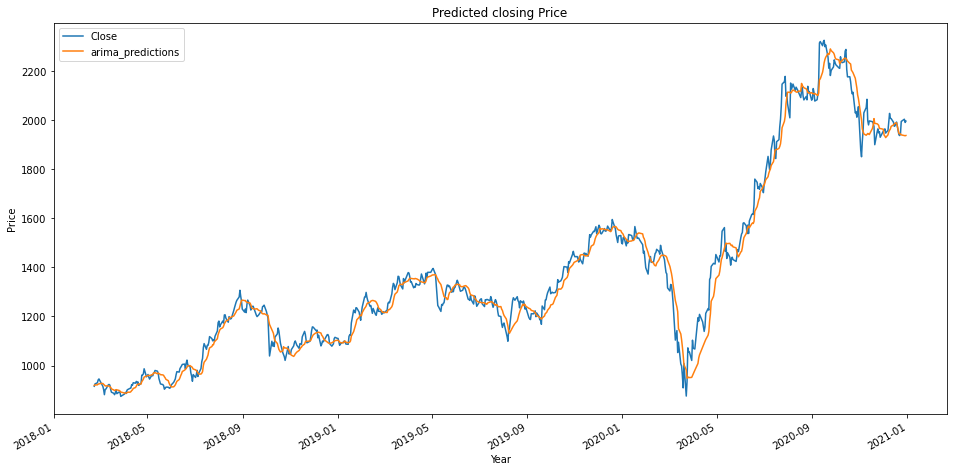

In [171]:
test_data[["Close","arima_predictions"]].plot(figsize=(16,8))
plt.ylabel("Price")
plt.xlabel("Year")
plt.title("Predicted closing Price")

## Evaluation

In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error   #Mean_absolute_error & mean_squared_error

In [170]:
mean_squared_error(test_data['Close'],test_data['arima_predictions'])

2471.4586059772064

In [167]:
mean_absolute_error(test_data['Close'],test_data['arima_predictions'])

36.179512509630534

### Mean Squared Error : 2471.4586059772064
### Mean Absolute Error : 36.179512509630534

# THANK YOU